# A

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score


train_df = pd.read_csv('./project_ecoli_localization.train.csv')
test_df = pd.read_csv('./project_ecoli_localization.test.csv')

X = train_df.drop(['class'], axis=1)
y = train_df['class']

import warnings
warnings.filterwarnings('ignore')

In [111]:
train_df.head()

,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [112]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     321 non-null    float64
 1   gvh     321 non-null    float64
 2   lip     321 non-null    float64
 3   chg     321 non-null    float64
 4   aac     321 non-null    float64
 5   alm1    321 non-null    float64
 6   alm2    321 non-null    float64
 7   class   321 non-null    object 
dtypes: float64(7), object(1)
memory usage: 20.2+ KB


In [113]:
train_df.describe()

,mcg,gvh,lip,chg,aac,alm1,alm2
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,0.500561,0.500717,0.496199,0.501558,0.500374,0.500997,0.501340
std,0.196304,0.148015,0.090481,0.027907,0.123016,0.213197,0.206564
min,0.000000,0.240000,0.480000,0.500000,0.000000,0.030000,0.010000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
50%,0.500000,0.470000,0.480000,0.500000,0.500000,0.460000,0.430000
75%,0.670000,0.570000,0.480000,0.500000,0.570000,0.710000,0.700000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


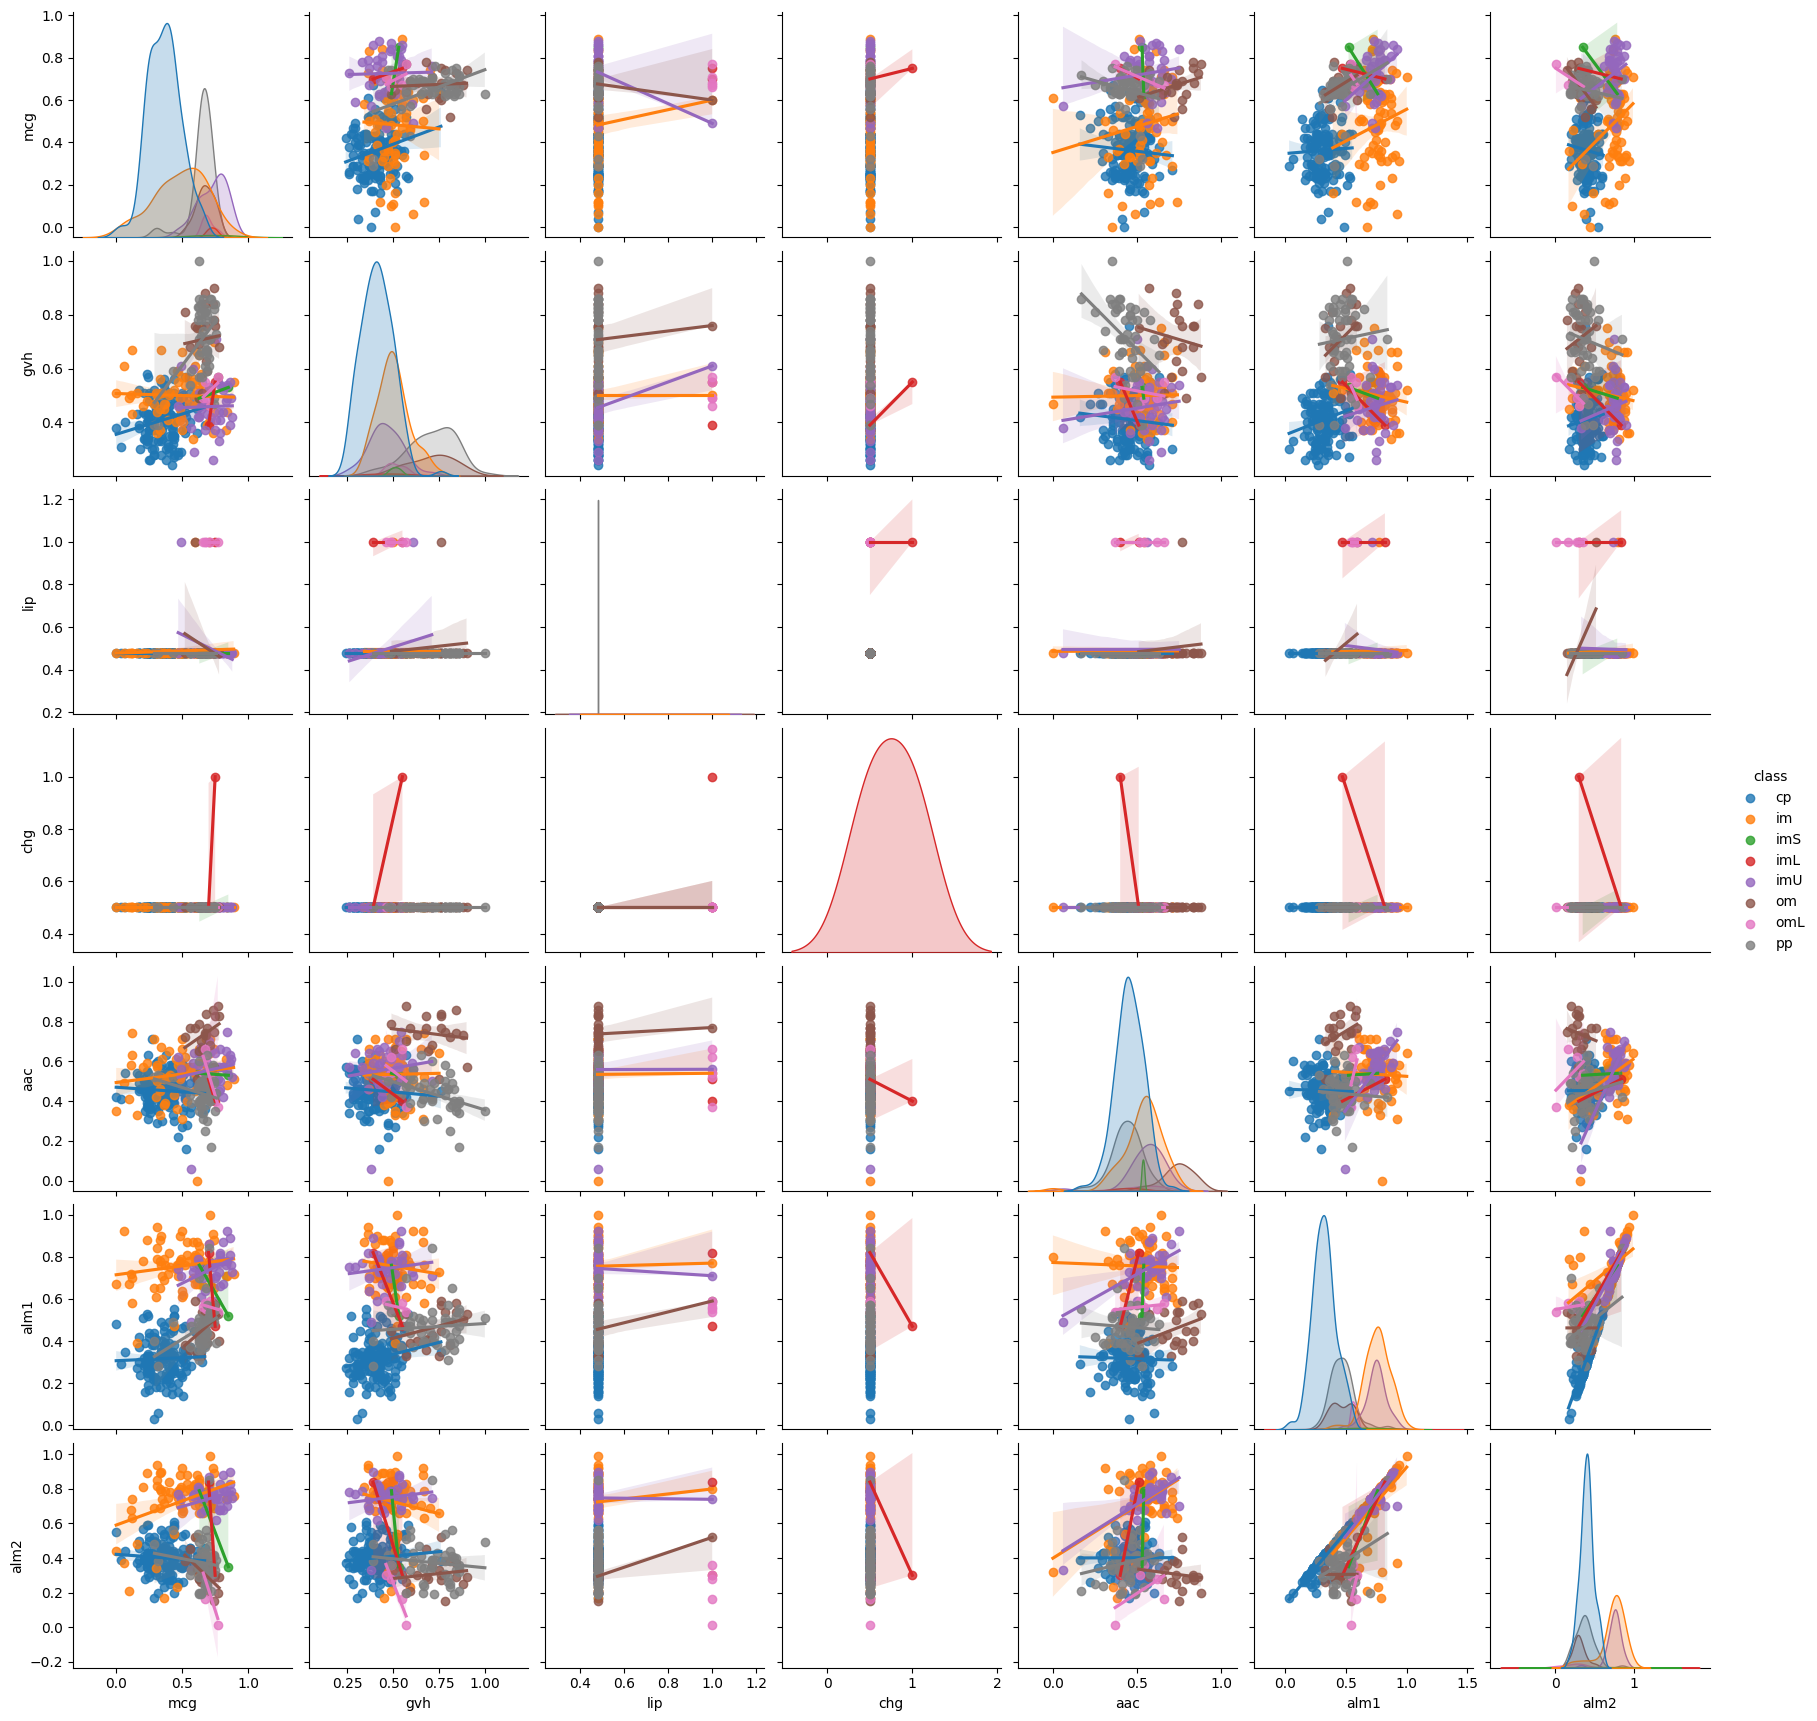

In [114]:
sns.pairplot(train_df, kind='reg', hue="class", diag_kind="kde", height=2.5)
plt.show()

# B

In [115]:
train_df.columns

Index(['mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'class'], dtype='object')

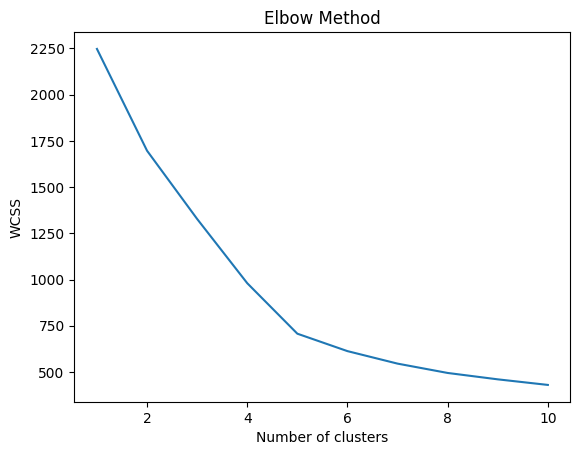

In [116]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


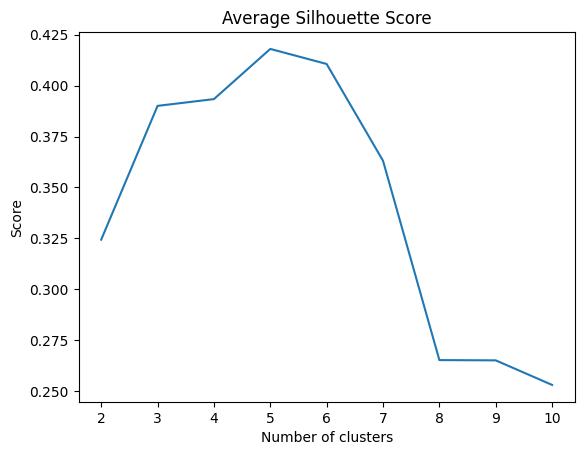

In [117]:
# Average silhouette score
sil_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_std)
    sil_scores.append(silhouette_score(X_std, kmeans.labels_))
plt.plot(range(2, 11), sil_scores)
plt.title('Average Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

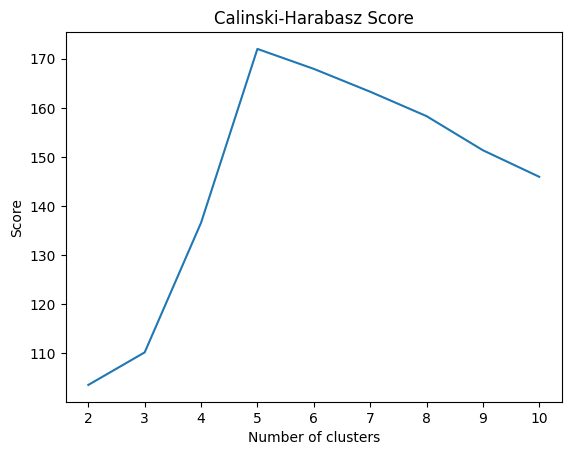

In [118]:
# Calinski-Harabasz score
ch_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_std)
    ch_scores.append(calinski_harabasz_score(X_std, kmeans.labels_))
plt.plot(range(2, 11), ch_scores)
plt.title('Calinski-Harabasz Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

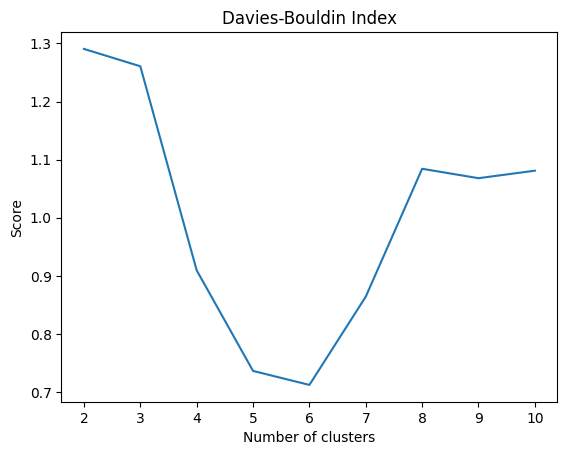

In [119]:
# Davies-Bouldin Index
db_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_std)
    db_scores.append(davies_bouldin_score(X_std, kmeans.labels_))
plt.plot(range(2, 11), db_scores)
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

In [120]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
kmeans.fit(X)
y_pred = kmeans.predict(X)

ari = adjusted_rand_score(y, y_pred)
print('ARI: {:.3f}'.format(ari))

ARI: 0.689


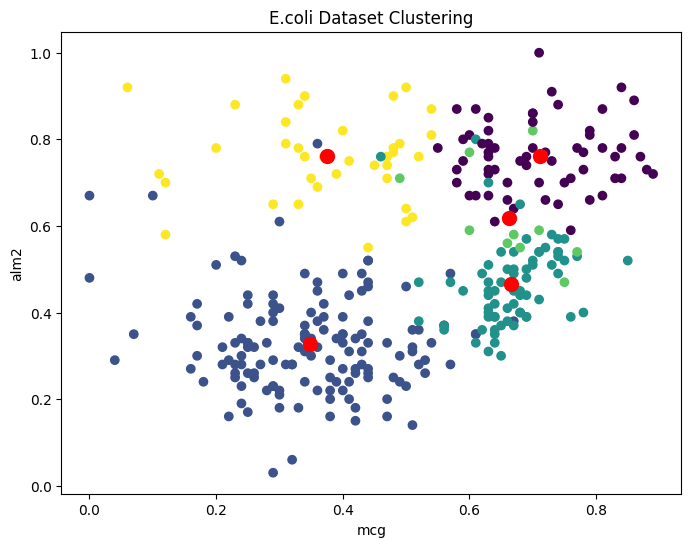

In [121]:
cluster_centers = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 5], c=y_pred, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 5], c='red', s=100)
plt.xlabel('mcg')
plt.ylabel('alm2')
plt.title('E.coli Dataset Clustering')
plt.show()


# C

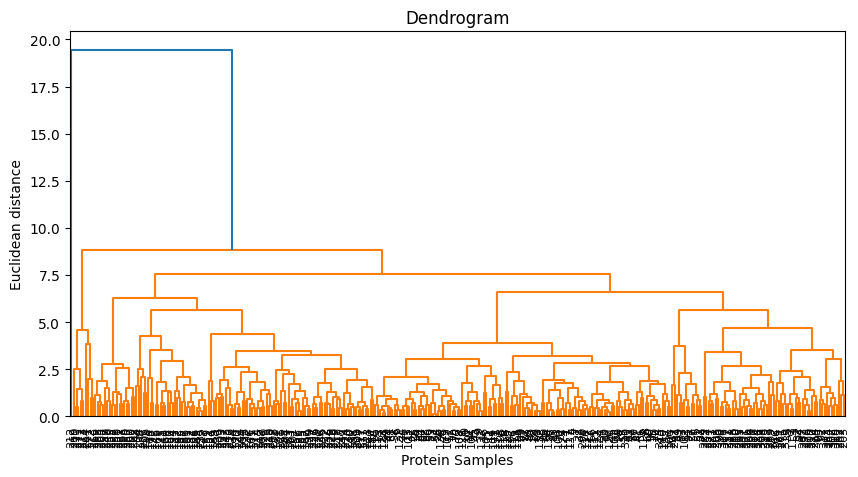

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Generate the linkage matrix using complete linkage
Z = linkage(X_scaled, method='complete')

plt.figure(figsize=(10, 5))
plt.title('Dendrogram')
plt.xlabel('Protein Samples')
plt.ylabel('Euclidean distance')
dendrogram(Z, leaf_rotation=90, leaf_font_size=8)
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='complete', distance_threshold=0)

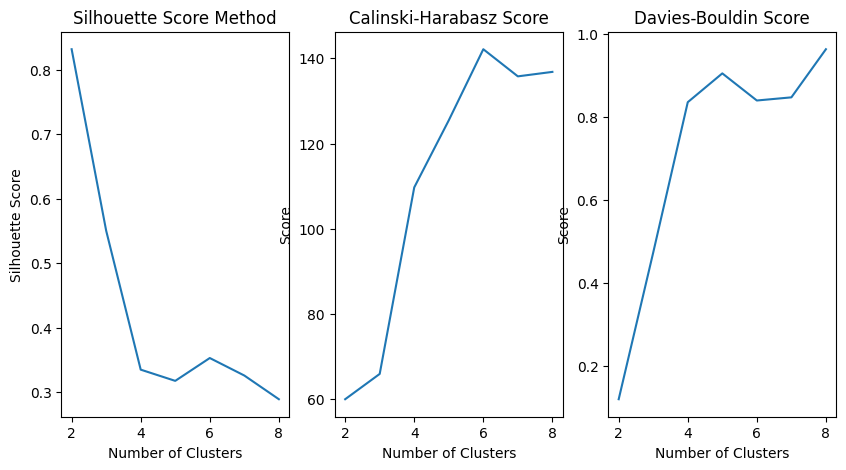

<Figure size 3000x500 with 0 Axes>

In [ ]:
silhouette_scores = []
for n_clusters in range(2, 9):
    agg = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='complete')
    labels = agg.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)


ch_scores = []
for n_clusters in range(2, 9):
    agg = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='complete')
    labels = agg.fit_predict(X_scaled)
    score = calinski_harabasz_score(X_scaled, labels)
    ch_scores.append(score)


db_scores = []
for n_clusters in range(2, 9):
    agg = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='complete')
    labels = agg.fit_predict(X_scaled)
    score = davies_bouldin_score(X_scaled, labels)
    db_scores.append(score)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

# silhouette
ax[0].plot(np.arange(2, 9), silhouette_scores)
ax[0].set_title('Silhouette Score Method')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Silhouette Score')

# Calinski-Harabasz
ax[1].plot(np.arange(2, 9), ch_scores)
ax[1].set_title('Calinski-Harabasz Score')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Score')


# Davies-Bouldin
plt.figure(figsize=(30, 5))
ax[2].plot(np.arange(2, 9), db_scores)
ax[2].set_title('Davies-Bouldin Score')
ax[2].set_xlabel('Number of Clusters')
ax[2].set_ylabel('Score')

# plt.tight_layout()
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering

#complete linkage and Euclidean distance
clustering = AgglomerativeClustering(n_clusters=8, linkage='complete', affinity='euclidean')
labels = clustering.fit_predict(X)

ari = adjusted_rand_score(y, labels)
print('ARI: {:.3f}'.format(ari))

ARI: 0.710


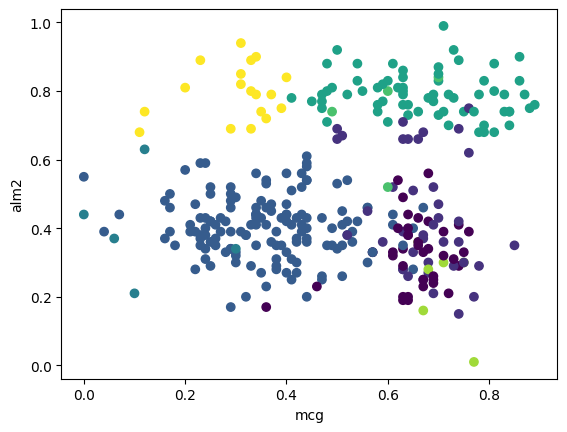

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 6], c=labels)
plt.xlabel('mcg')
plt.ylabel('alm2')
plt.show()

In [ ]:
# single linkage 
clustering = AgglomerativeClustering(n_clusters=8, linkage='single', affinity='euclidean')
labels = clustering.fit_predict(X)

ari = adjusted_rand_score(y, labels)
print(ari)

0.041965163328081326


c:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
# average linkage
clustering = AgglomerativeClustering(n_clusters=8, linkage='average', affinity='euclidean')
labels = clustering.fit_predict(X)

ari = adjusted_rand_score(y, labels)
print(ari)

0.7310745010979252


c:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


# E

In [151]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_std)

clustering = AgglomerativeClustering(n_clusters=8).fit(X_pca)
ari = adjusted_rand_score(y, clustering.labels_)
print(f'n_components=6 - Ari:{ari}')


pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_std)

clustering = AgglomerativeClustering(n_clusters=8).fit(X_pca)
ari = adjusted_rand_score(y, clustering.labels_)
print(f'n_components=5 - Ari:{ari}')


n_components=6 - Ari:0.5010941258870402
n_components=5 - Ari:0.4144139369928667


# F

In [130]:
clustering = AgglomerativeClustering(n_clusters=8, linkage='average', affinity='euclidean')
y_pred = clustering.fit_predict(test_df.iloc[: , :7])
y_pred

array([7, 3, 2, 1, 2, 0, 0, 6, 0, 0, 5, 1, 1, 1, 4], dtype=int64)

# G

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtc = DecisionTreeClassifier(max_depth=5, min_samples_leaf=7)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy = dtc.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.8153846153846154


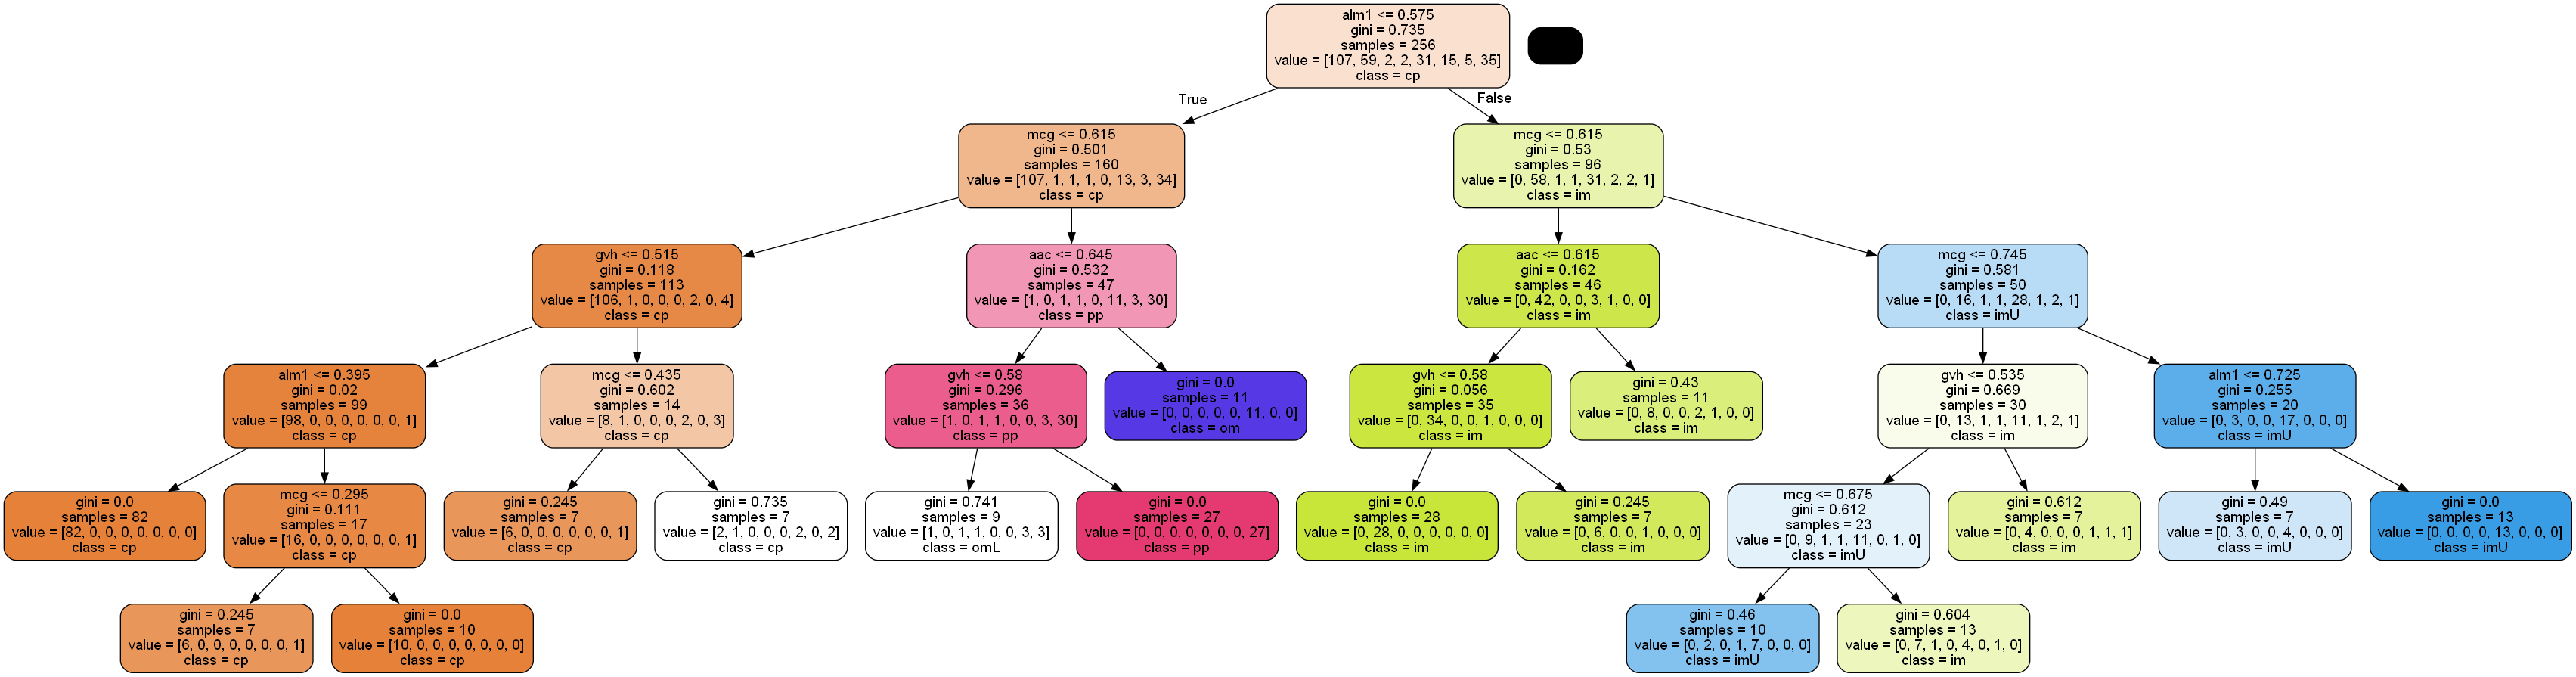

In [ ]:
import pydotplus
from IPython.display import Image
dot = export_graphviz(dtc, out_file=None, feature_names=X.columns, class_names=dtc.classes_, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8153846153846154


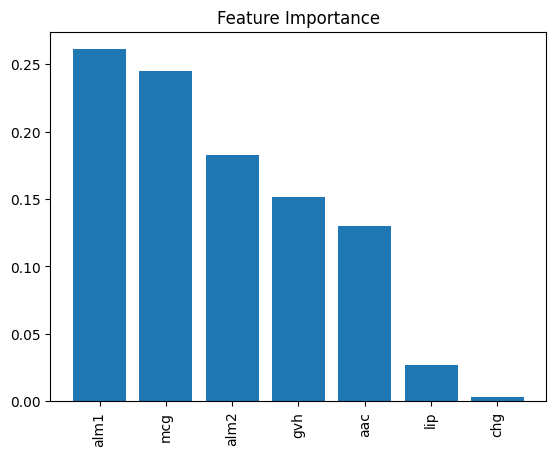

In [ ]:
importances = rf.feature_importances_

# Calculate feature importances
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = xgb.XGBClassifier(  gamma=0.2,  random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = (y_pred == y_test).mean()
print("Accuracy:", accuracy)

Accuracy: 0.8153846153846154


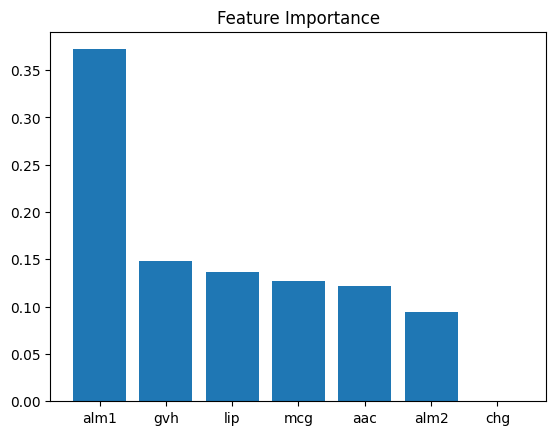

In [ ]:
importances = clf.feature_importances_

# Calculate feature importances
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names,)
plt.show()

In [ ]:
rf_pred = rf.predict(test_df.iloc[: , :7])
xgb_pred = clf.predict(test_df.iloc[: , :7])

xgb_pred = label_encoder.inverse_transform(xgb_pred)

preds = pd.DataFrame({'rf': rf_pred, 'xgb': xgb_pred})
preds

,rf,xgb
0,cp,cp
1,cp,cp
2,cp,cp
3,cp,cp
4,cp,cp
5,im,im
6,im,im
7,im,im
8,im,im
9,im,im
